In [13]:
%matplotlib inline
from __future__ import print_function
import sys
import scipy.io, rwt
import numpy as np
import matplotlib.pyplot as plt
import pySPIRALTAP
sys.path.append('/home/maxime/code/pySPIRAL-TAP/')
from conv2 import conv2

In [26]:
rf=scipy.io.loadmat("../3_code/SPIRALTAP/demodata/imagedata.mat")
f, blur, y = (np.float_(rf['f']), np.float_(rf['blur']), np.float_(rf['y']))

A = lambda x: conv2(x, blur, 'same')
AT = lambda x: conv2(x, blur, 'same')
Af = A(f)

# ==== Setup wavelet basis for l1-onb
wav = rwt.daubcqf(2)[0]
W = lambda x: rwt.idwt(x,wav)[0]
WT = lambda x: rwt.dwt(x,wav)[0]

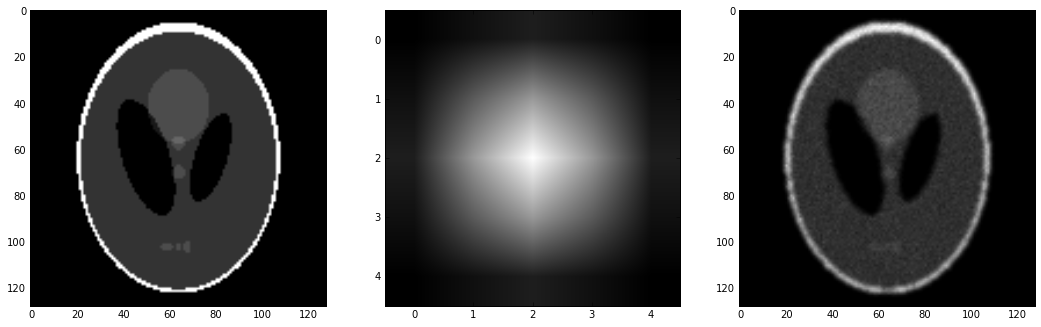

In [3]:
plt.figure(figsize=(18,6))
plt.subplot(131)
plt.imshow(f, cmap='gray')
plt.subplot(132)
plt.imshow(blur, cmap='gray')
plt.subplot(133)
plt.imshow(y, cmap='gray')

In [42]:
finit = y.sum()*AT(y).size/AT(y).sum()/AT(np.ones_like(y)).sum() * AT(y)

# ==== Set regularization parameters and iteration limit:
tauonb      = 1.0e-5
tautv       = 3.0e-6
taurdp      = 2.0e+0
taurdpti    = 6.0e-1
    
miniter = 50
maxiter = 100
stopcriterion = 3
tolerance = 1e-8
verbose = 10

# ==== ONB reconstruction
resSPIRAL = pySPIRALTAP.SPIRALTAP(y, A, tauonb, penalty='onb', AT=AT, W=W, WT=WT,
                                      maxiter=maxiter, initialisation=finit, miniter=miniter,
                                      stopcriterion=stopcriterion, monotone=True, 
                                      saveobjective=True, savereconerror=True, savecputime=True, 
                                      savesolutionpath=False, truth=f, verbose=verbose)

# Deparsing outputs
fhatSPIRALonb = resSPIRAL[0]
parSPIRAL = resSPIRAL[1]
iterationsSPIRALonb = parSPIRAL['iterations']
objectiveSPIRALonb = parSPIRAL['objective']
reconerrorSPIRALonb = parSPIRAL['reconerror']
cputimeSPIRALonb = parSPIRAL['cputime']

# ==== TV reconstruction
resSPIRAL = pySPIRALTAP.SPIRALTAP(y, A, tautv, penalty='tv', AT=AT,
                                  maxiter=maxiter, initialisation=finit, miniter=miniter,
                                  stopcriterion=stopcriterion, tolerance=tolerance,
                                  monotone=True, saveobjective=True, savereconerror=True,
                                  savecputime=True, savesolutionpath=False, truth=f,
                                  verbose=verbose)
## Deparse outputs
fhatSPIRALtv = resSPIRAL[0]
parSPIRAL = resSPIRAL[1]
iterationsSPIRALtv = parSPIRAL['iterations']
objectiveSPIRALtv = parSPIRAL['objective']
reconerrorSPIRALtv = parSPIRAL['reconerror']
cputimeSPIRALtv = parSPIRAL['cputime']


= Beginning SPIRAL Reconstruction    @ 2016-06-09 14:07:16.133330 =
=   Noisetype: Poisson               Penalty: onb           =
=   Tau:       1e-05                 Maxiter: 100                 =

Iter: 10, ||dx||%%: 49.9354114337, Alph: 0.000421428880335, Alph Acc: 0.000210714440168, Time: 2.8321621418, Obj: 464502.577168, dObj%%: 52.6821709012, Err: 0.99676988688
Iter: 20, ||dx||%%: 14.9633136184, Alph: 2.51397260618e-09, Alph Acc: 1.25698630309e-09, Time: 4.29549598694, Obj: -2793551.79088, dObj%%: 0.480478636207, Err: 0.396122247885
Iter: 30, ||dx||%%: 8.53711889e-08, Alph: 14859.270733, Alph Acc: 7429.63536651, Time: 5.74828600883, Obj: -2798991.50924, dObj%%: 9.90576776078e-05, Err: 0.336466239976
Iter: 40, ||dx||%%: 8.79767085155e-05, Alph: 0.0141120588619, Alph Acc: 0.00705602943094, Time: 7.18591713905, Obj: -2799019.287, dObj%%: 9.99989710846e-05, Err: 0.336466235184
Iter: 50, ||dx||%%: 2.7314902269, Alph: 3.06679323884e-09, Alph Acc: 1.53339661942e-09, Time: 8.63127803802

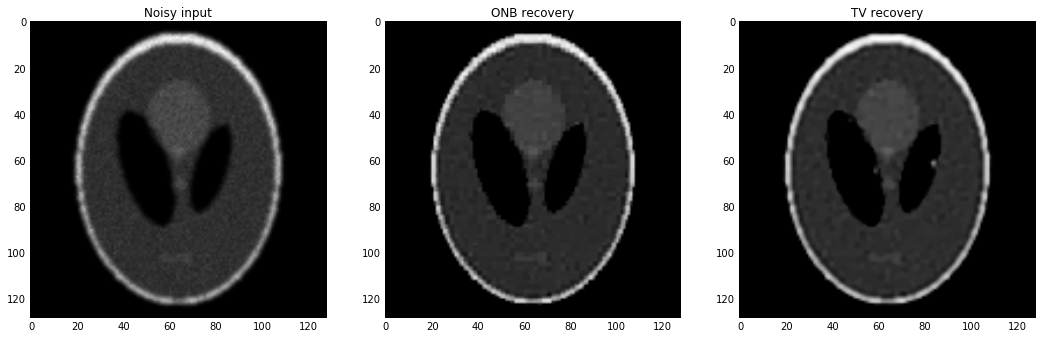

In [41]:
plt.figure(figsize=(18,6))
plt.subplot(131)
plt.imshow(y, cmap='gray')
plt.title('Noisy input')
plt.subplot(132)
plt.imshow(fhatSPIRALonb, cmap='gray')
plt.title('ONB recovery')
plt.subplot(133)
plt.imshow(fhatSPIRALtv, cmap='gray')
plt.title('TV recovery')

In [39]:
## Testing: dummy = y + A(WT(W(AT(y))))
print("A(y):", A(y).sum()) # ok
print("AT(y):", AT(y).sum()) # ok
print("dummy:", (y+A(WT(W(AT(y))))).sum()), # ok

A(y): 282.494477227
AT(y): 282.494477227
dummy: 750275.106365


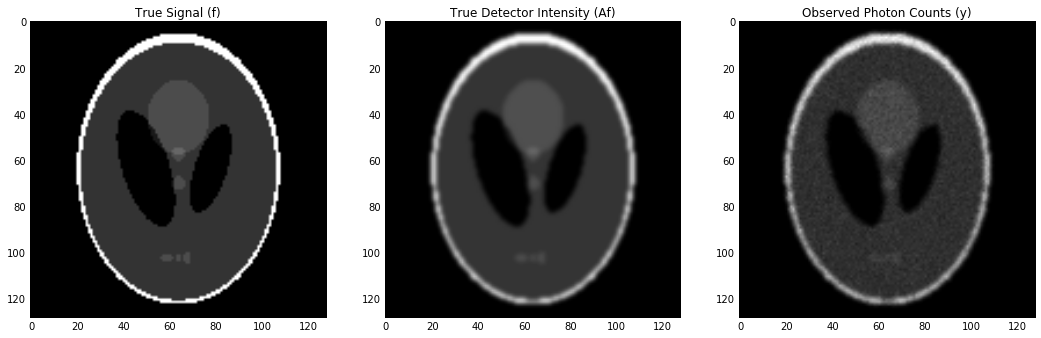

In [46]:
plt.figure(figsize=(18,6))
plt.subplot(131); plt.imshow(f, cmap='gray'); plt.title('True Signal (f)')
plt.subplot(132); plt.imshow(Af, cmap='gray'); plt.title('True Detector Intensity (Af)')
plt.subplot(133); plt.imshow(y, cmap='gray'); plt.title('Observed Photon Counts (y)')

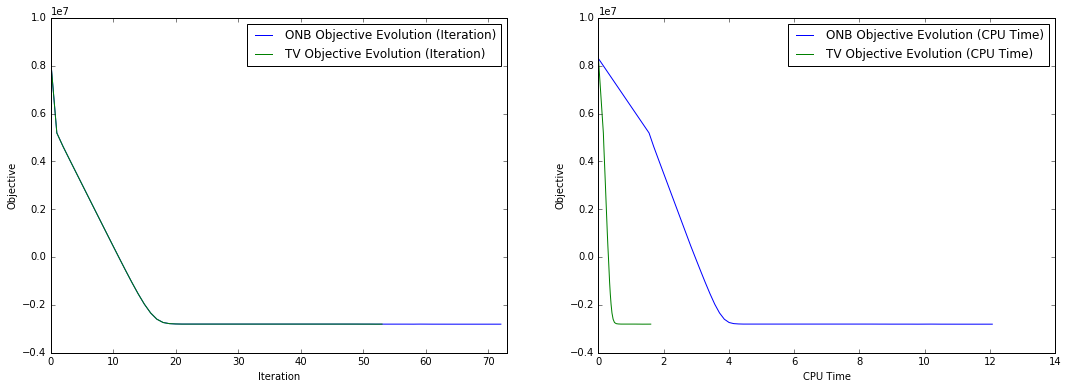

In [56]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.plot(range(iterationsSPIRALonb), objectiveSPIRALonb,
         label='ONB Objective Evolution (Iteration)')
plt.plot(range(iterationsSPIRALtv), objectiveSPIRALtv,
        label='TV Objective Evolution (Iteration)')
plt.xlabel('Iteration');plt.ylabel('Objective');plt.legend()
plt.xlim((0, np.max((iterationsSPIRALonb, iterationsSPIRALtv))))

plt.subplot(122)
plt.plot(cputimeSPIRALonb, objectiveSPIRALonb, label='ONB Objective Evolution (CPU Time)')
plt.plot(cputimeSPIRALtv, objectiveSPIRALtv, label='TV Objective Evolution (CPU Time)')
plt.xlabel('CPU Time');plt.ylabel('Objective');plt.legend()

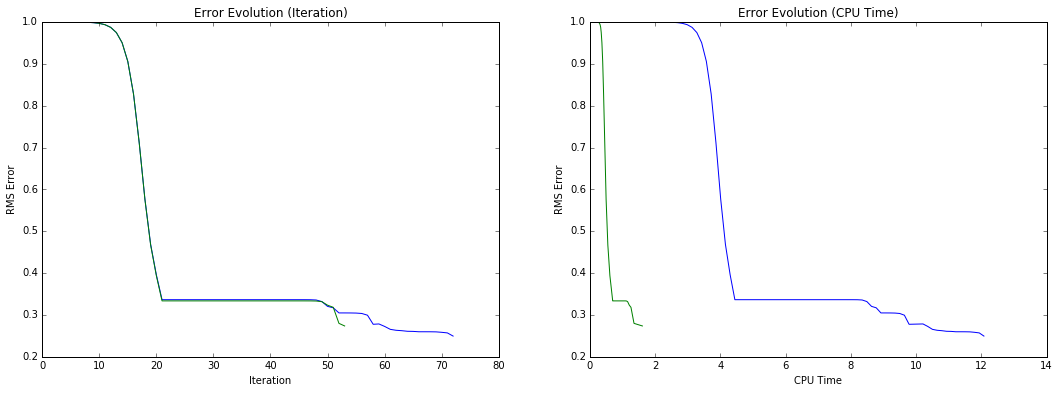

In [60]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.plot(range(iterationsSPIRALonb), reconerrorSPIRALonb, label='ONB')
plt.plot(range(iterationsSPIRALtv), reconerrorSPIRALtv, label='TV')
#plt.plot(range(iterationsSPIRALrdp), reconerrorSPIRALrdp, label='RDP')
#plt.plot(range(iterationsSPIRALrdpti), reconerrorSPIRALrdpti, label='RDP-TI')
plt.title('Error Evolution (Iteration)');plt.xlabel('Iteration');plt.ylabel('RMS Error')

plt.subplot(122)
plt.plot(cputimeSPIRALonb, reconerrorSPIRALonb, label='ONB')
plt.plot(cputimeSPIRALtv, reconerrorSPIRALtv, label='TV')
#plt.plot(cputimeSPIRALrdp), reconerrorSPIRALrdp, label='RDP')
#plt.plot(cputimeSPIRALrdpti), reconerrorSPIRALrdpti, label='RDP-TI')
plt.title('Error Evolution (CPU Time)');plt.xlabel('CPU Time');plt.ylabel('RMS Error')

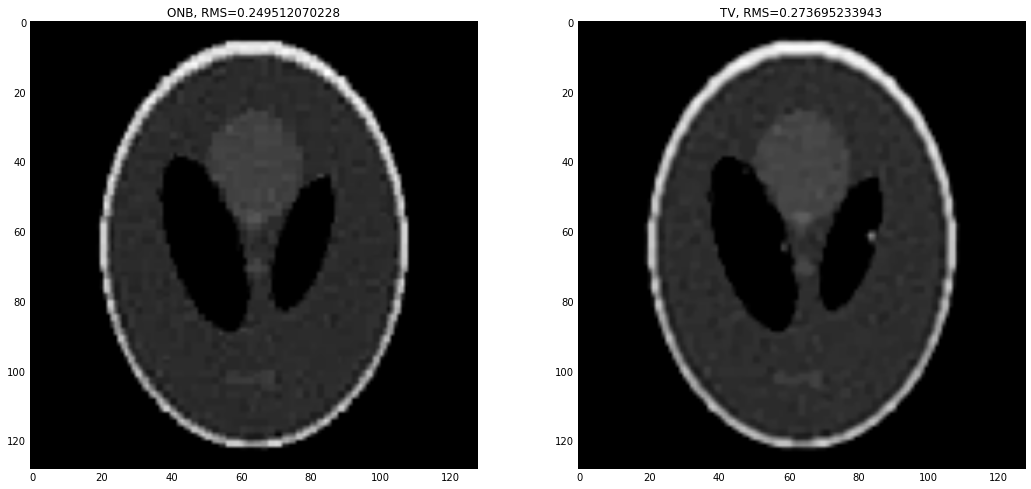

In [63]:
plt.figure(figsize=(18,8))
plt.subplot(121);plt.imshow(fhatSPIRALonb, cmap='gray')
plt.title("ONB, RMS={}".format(reconerrorSPIRALonb[-1]))
plt.subplot(122);plt.imshow(fhatSPIRALtv, cmap='gray')
plt.title("TV, RMS={}".format(reconerrorSPIRALtv[-1]))
#plt.subplot(223);plt.imshow(fhatSPIRALrdp, cmap='gray')
#plt.title("RDP, RMS=".format(reconerrorSPIRALrdp[-1]))
#plt.subplot(224);plt.imshow(fhatSPIRALrdpti, cmap='gray')
#plt.title("RDP-TI, RMS=".format(reconerrorSPIRALrdpti[-1]))

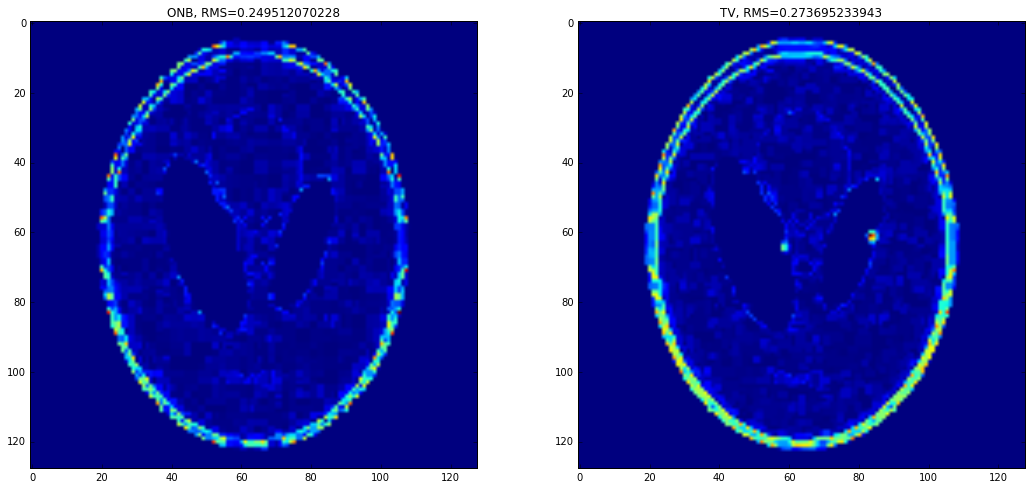

In [67]:
# Difference images
diffSPIRALonb = np.abs(f-fhatSPIRALonb)
diffSPIRALtv = np.abs(f-fhatSPIRALtv)
#diffSPIRALrdp = np.abs(f-fhatSPIRALrdp)
#diffSPIRALrdpti = np.abs(f-fhatSPIRALrdpti)

plt.figure(figsize=(18,8))
plt.subplot(121);plt.imshow(diffSPIRALonb)
plt.title("ONB, RMS={}".format(reconerrorSPIRALonb[-1]))
plt.subplot(122);plt.imshow(diffSPIRALtv)
plt.title("TV, RMS={}".format(reconerrorSPIRALtv[-1]))
#plt.subplot(223);plt.imshow(diffSPIRALrdp)
#plt.title("RDP, RMS=".format(reconerrorSPIRALrdp[-1]))
#plt.subplot(224);plt.imshow(diffSPIRALrdpti)
#plt.title("RDP-TI, RMS=".format(reconerrorSPIRALrdpti[-1]))